In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('C:\\Users\\abinb\\OneDrive\\Documents\\Desktop\\New folder\\movie.csv',encoding = 'latin1')  # Replace with your dataset file path

# Preview data
print("Dataset Preview:")
print(df.head())

# Basic statistics
print("\nData Summary:")
print(df.describe())

# Data info
print("\nData Info:")
print(df.info())

# Handle missing values
df.fillna('Unknown', inplace=True)

Dataset Preview:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddha

C:\Users\abinb\AppData\Local\Temp\ipykernel_9836\1826108294.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('Unknown', inplace=True)


In [4]:
# Convert 'Rating' to numeric and drop rows with missing/invalid values
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating'])

# Fill missing values in categorical columns with 'Unknown'
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

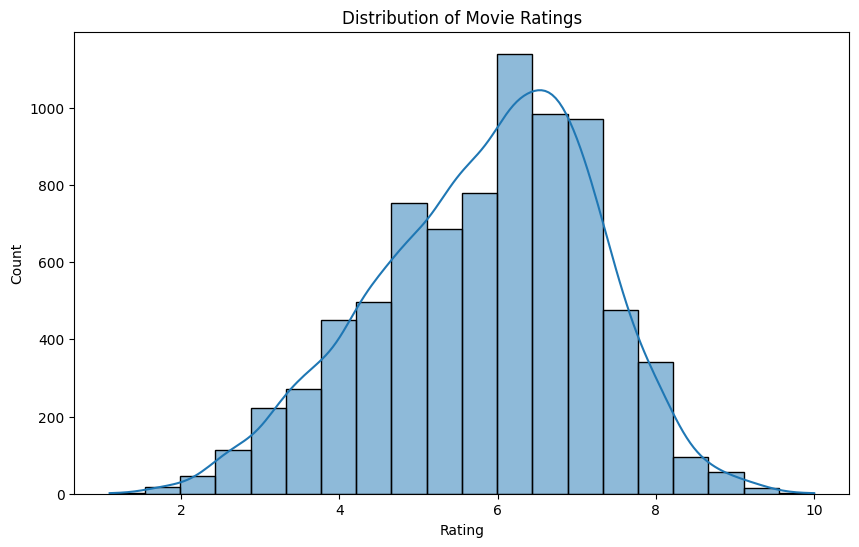

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

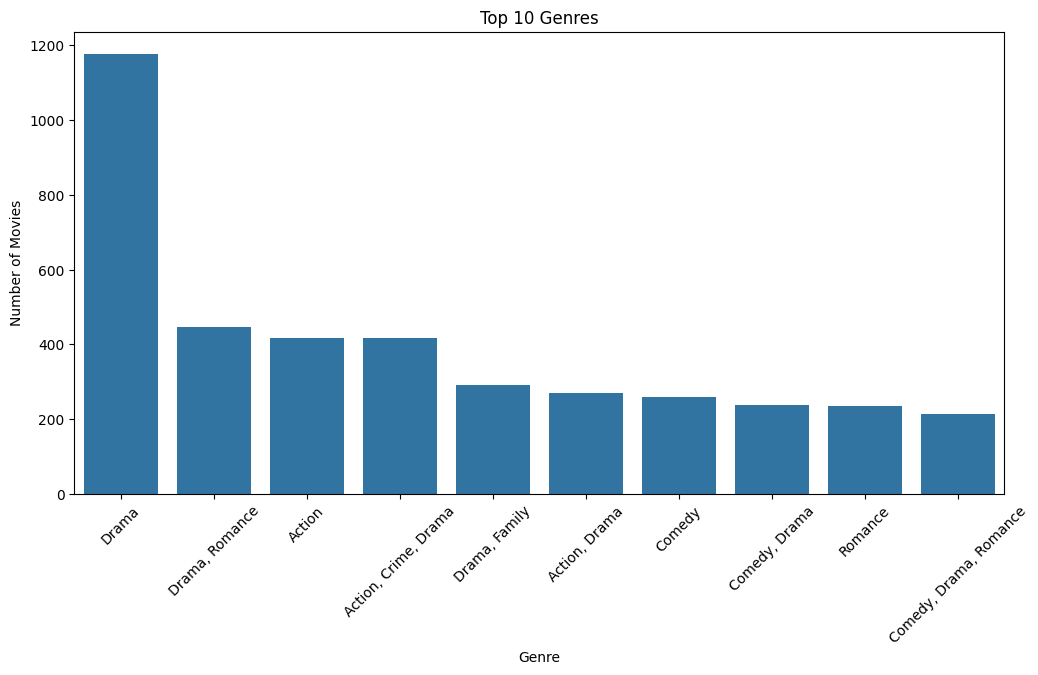

In [6]:
plt.figure(figsize=(12, 6))
top_genres = df['Genre'].value_counts().nlargest(10)
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 10 Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

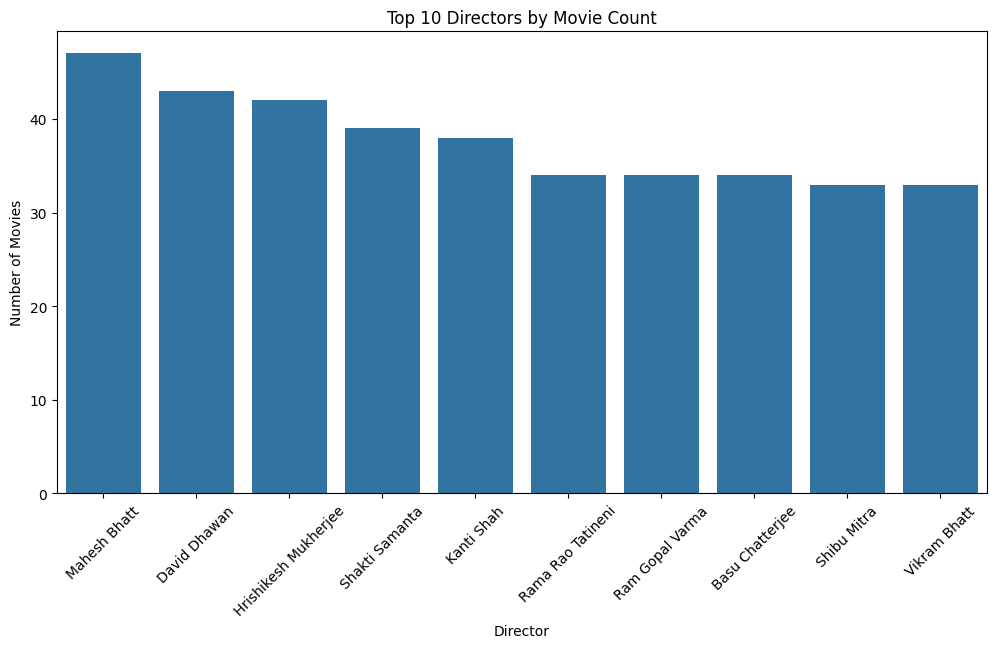

In [7]:
plt.figure(figsize=(12, 6))
top_directors = df['Director'].value_counts().nlargest(10)
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.title('Top 10 Directors by Movie Count')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

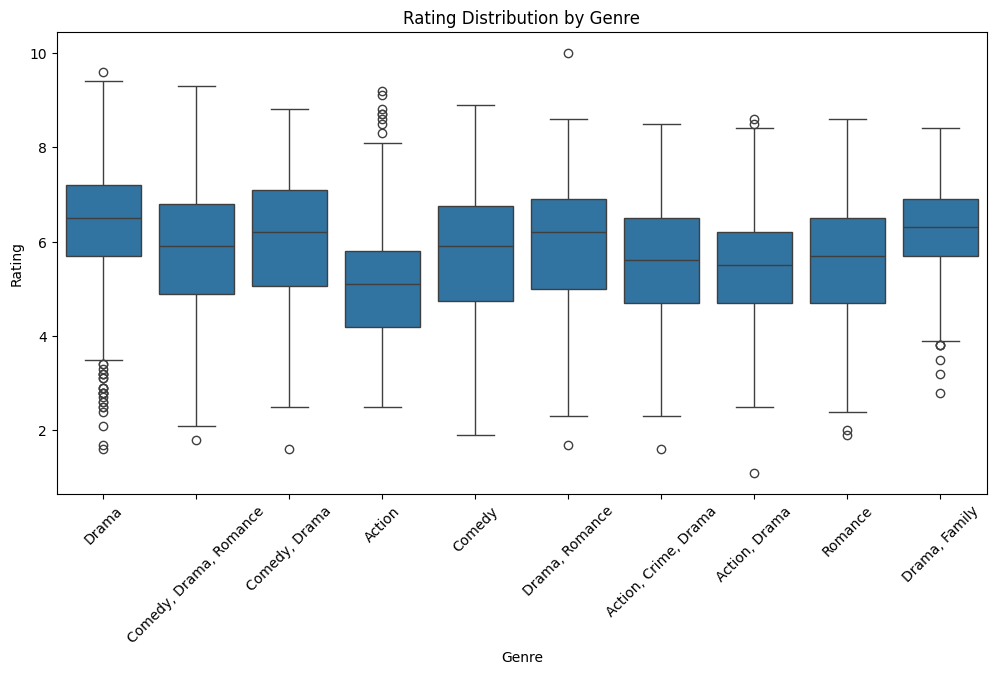

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Rating', data=df[df['Genre'].isin(top_genres.index)])
plt.title('Rating Distribution by Genre')
plt.xticks(rotation=45)
plt.show()

In [9]:
X = df[categorical_cols]
y = df['Rating']

# One-hot encode categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)



In [10]:

model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)


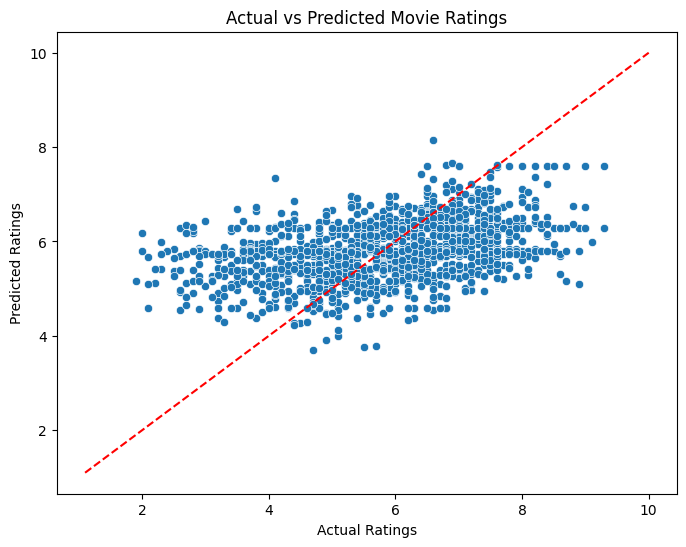

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()